In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
import glob

# Create a list of tuples, each containing:
# 1. A name identifying the sample size (e.g., '500')
# 2. The corresponding point cloud loaded from a NumPy file
samples = [
    (filename.split('_')[-1].split('.')[0], np.load(filename))
    for filename in glob.glob('dragon_vrip_sampled_*.npy')
]

# Sort samples by their numeric values (convert string names to integers for proper sorting)
samples.sort(key=lambda x: int(x[0]))
print("Samples loaded and sorted:")

Samples loaded and sorted:


In [2]:
# sampled_500 = np.load('dragon_vrip_sampled_500.npy')
# dc_500 = gd.DelaunayCechComplex(points = sampled_500)
# st_500 = dc_500.create_simplex_tree(output_squared_values = False)
# bc_500 = st_500.persistence()
# gd.plot_persistence_barcode(bc_500, legend = True)

In [3]:
# gd.plot_persistence_diagram(bc_500, legend = True)

Diagram for 500:


/home/isabella/Develop/LabComp/ve/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:134: UserWarning: usetex mode requires dvipng.
  warnings.warn("usetex mode requires dvipng.")


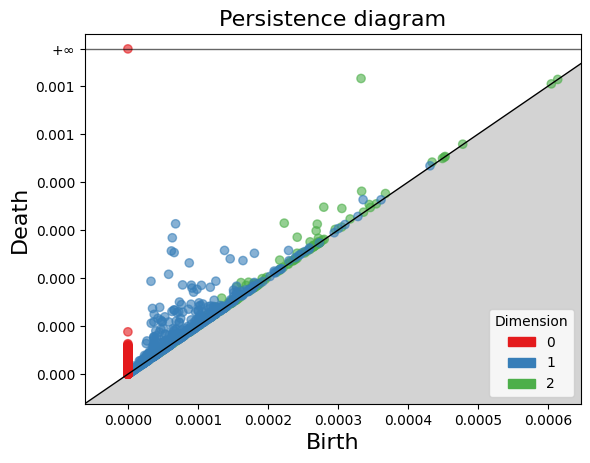

Diagram for 750:


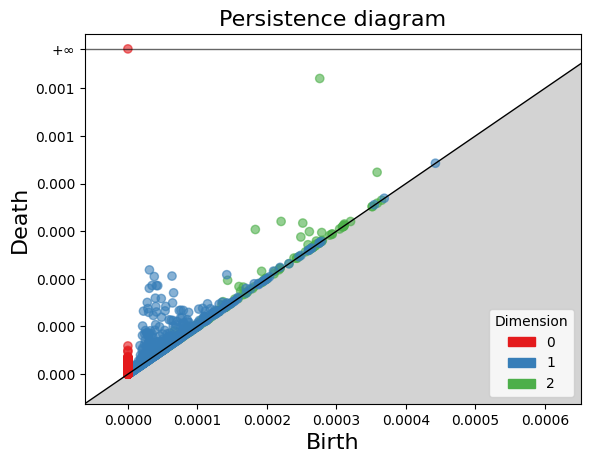

Diagram for 1000:


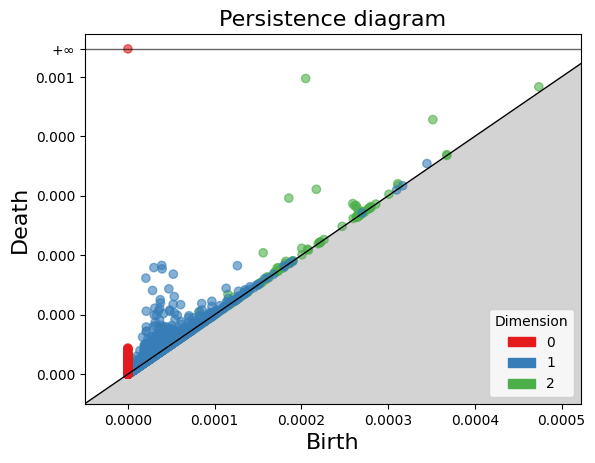

Diagram for 1250:


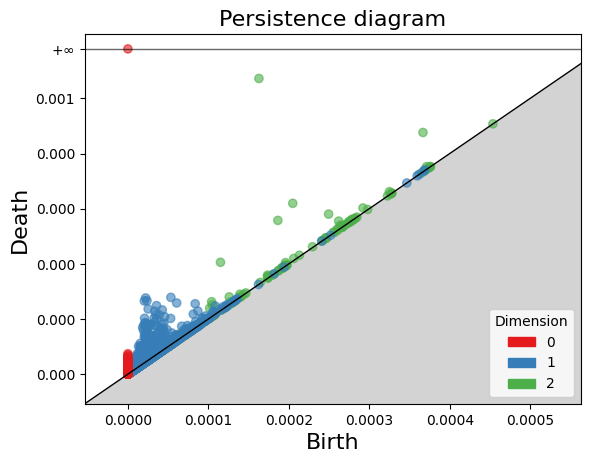

Diagram for 1500:


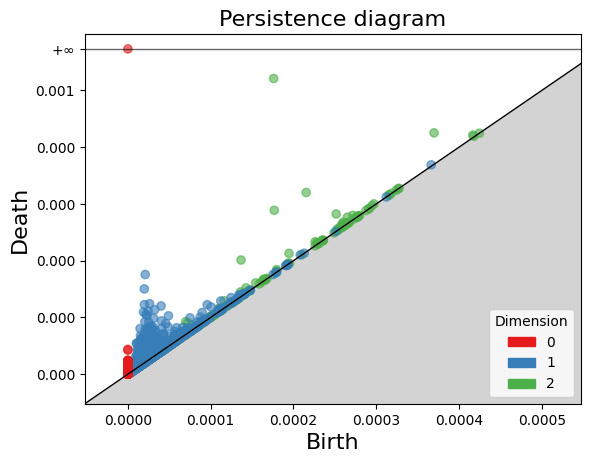

Diagram for 1750:


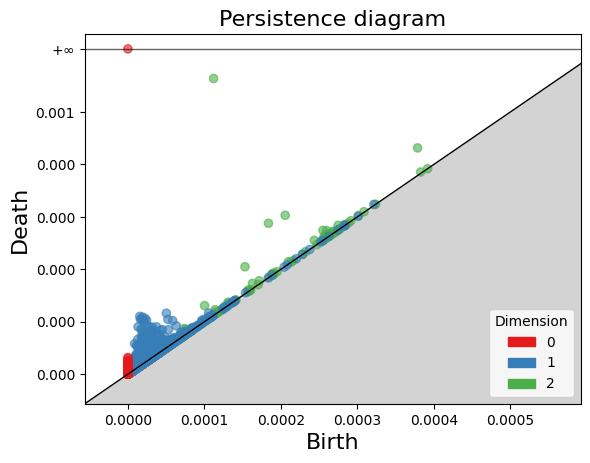

Diagram for 2000:


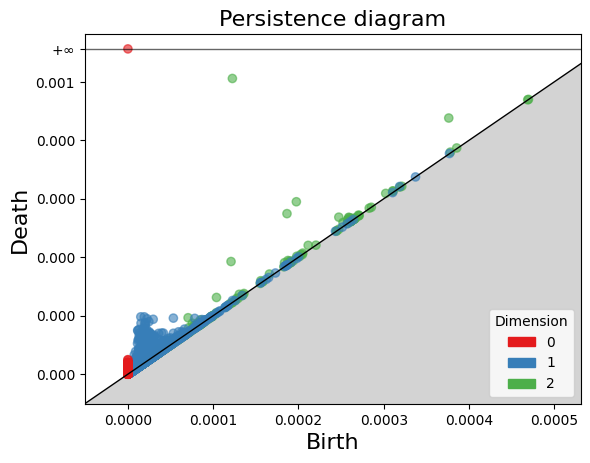

Diagram for 2250:


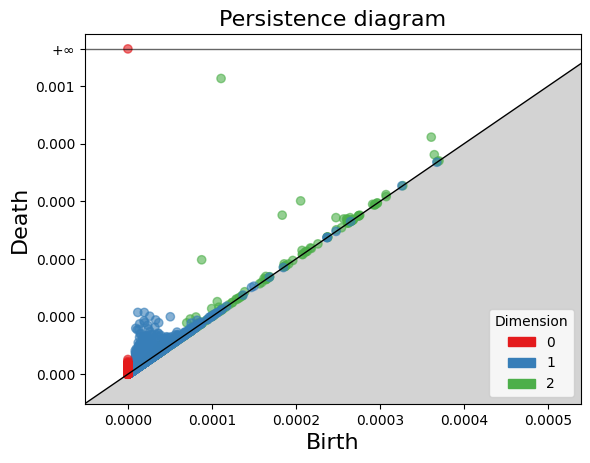

Diagram for 2500:


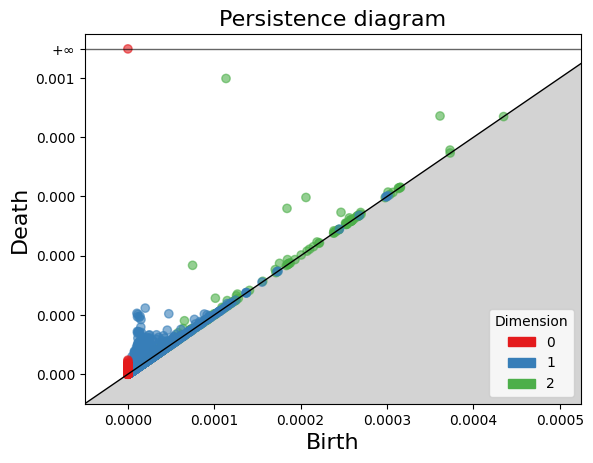

Diagram for 2750:


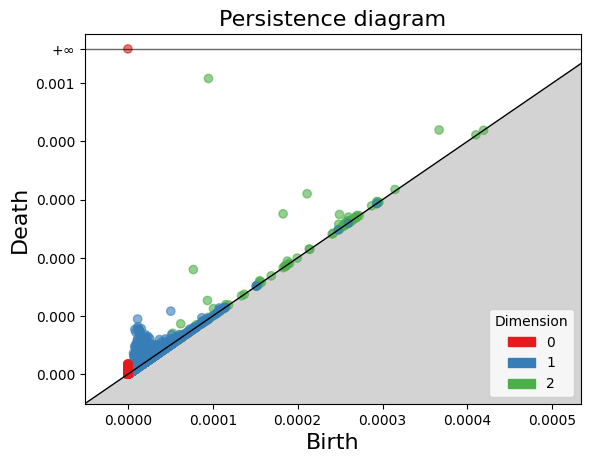

Diagram for 3000:


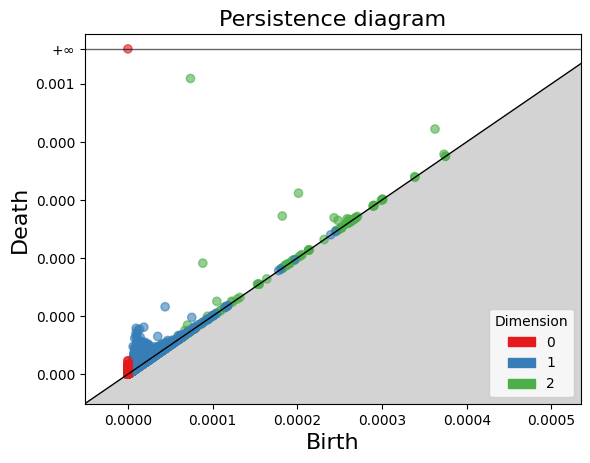

Diagram for 3250:


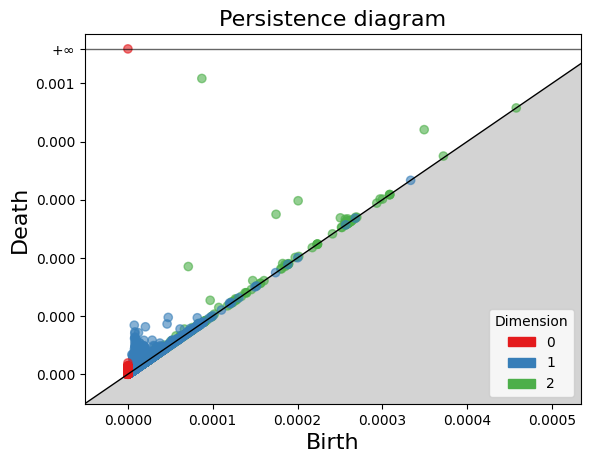

Diagram for 3500:


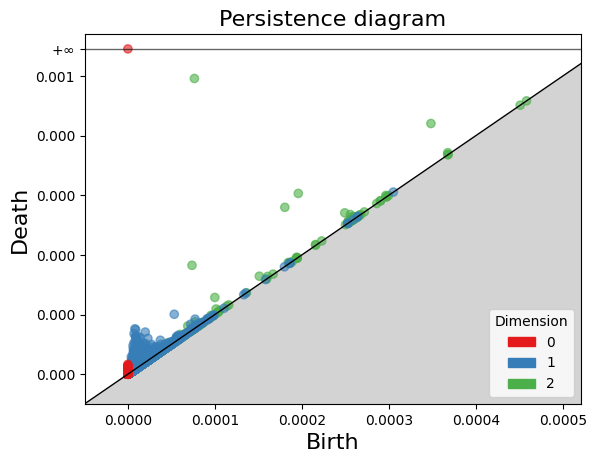

Diagram for 3750:


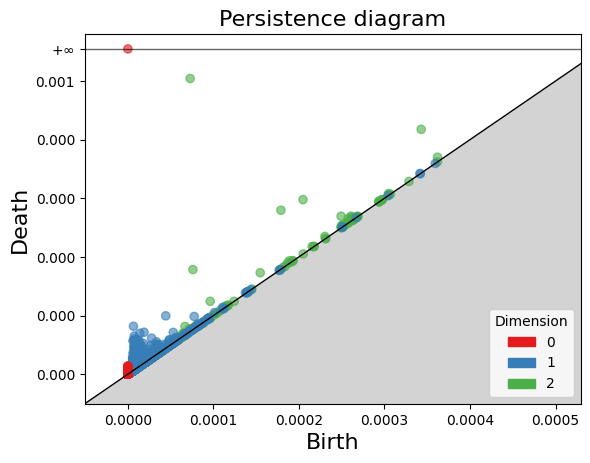

Diagram for 4000:


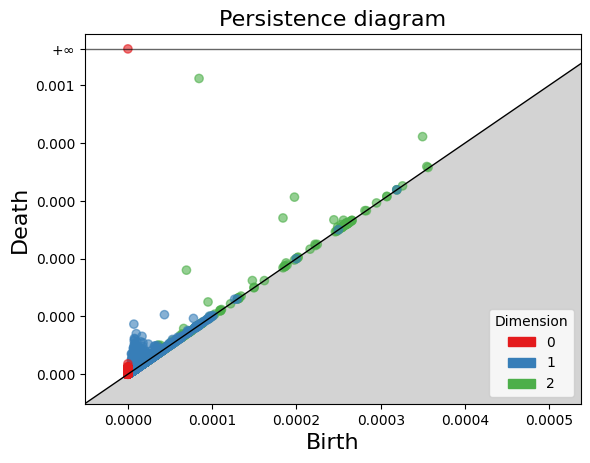

In [4]:
for name, points in samples:
    ac = gd.DelaunayCechComplex(points=points)
    st = ac.create_simplex_tree()
    bc = st.persistence()
    # print(f"Barcode for {name}:")
    # gd.plot_persistence_barcode(bc, legend=True)
    # plt.show()
    print(f"Diagram for {name}:")
    gd.plot_persistence_diagram(bc, legend=True)
    plt.show()

In [5]:
# Create lists to store persistence intervals for each homological dimension
# pl0: connected components (dimension 0)
# pl1: loops/cycles (dimension 1) 
# pl2: voids/cavities (dimension 2)
pl0 = []
pl1 = []
pl2 = []

# Process each sample to extract persistence intervals
for name, points in samples:
    # Create Alpha Complex from point cloud
    ac = gd.DelaunayCechComplex(points=points)
    
    # Build simplex tree for topological analysis
    st = ac.create_simplex_tree()
    
    # Compute persistent homology
    bc = st.persistence()
    
    # Extract persistence intervals for each dimension and store them
    pl0.append(st.persistence_intervals_in_dimension(0))  # Connected components
    pl1.append(st.persistence_intervals_in_dimension(1))  # Loops/cycles
    pl2.append(st.persistence_intervals_in_dimension(2))  # Voids/cavities
    
    print(f"Persistence intervals for {name} appended.")

# # Display the shape of persistence intervals for each sample and dimension
# for i, name in enumerate([s[0] for s in samples]):
#     print(f"{name}: dim0={pl0[i].shape}, dim1={pl1[i].shape}, dim2={pl2[i].shape}")

# Calculate the number of samples
l = len(samples)

# Initialize distance matrices for each homological dimension
# B0: bottleneck distances for connected components (dimension 0)
# B1: bottleneck distances for loops/cycles (dimension 1) 
# B2: bottleneck distances for voids/cavities (dimension 2)
B0 = np.zeros((l, l))
B1 = np.zeros((l, l))
B2 = np.zeros((l, l))

# Compute pairwise bottleneck distances between persistence intervals
# Only compute upper triangle to avoid redundant calculations
for i in range(l):
    for j in range(i):
        # Calculate bottleneck distance between persistence intervals of samples i and j
        B0[i,j] = gd.bottleneck_distance(pl0[i], pl0[j])  # Dimension 0
        B1[i,j] = gd.bottleneck_distance(pl1[i], pl1[j])  # Dimension 1
        B2[i,j] = gd.bottleneck_distance(pl2[i], pl2[j])  # Dimension 2
        print(f"Bottleneck distances for {samples[i][0]} and {samples[j][0]} computed.")

# Make distance matrices symmetric by adding the transpose
# This fills in the lower triangle with the same values as the upper triangle
B0 = B0 + B0.transpose()
B1 = B1 + B1.transpose()
B2 = B2 + B2.transpose()

Persistence intervals for 500 appended.
Persistence intervals for 750 appended.
Persistence intervals for 1000 appended.
Persistence intervals for 1250 appended.
Persistence intervals for 1500 appended.
Persistence intervals for 1750 appended.
Persistence intervals for 2000 appended.
Persistence intervals for 2250 appended.
Persistence intervals for 2500 appended.
Persistence intervals for 2750 appended.
Persistence intervals for 3000 appended.
Persistence intervals for 3250 appended.
Persistence intervals for 3500 appended.
Persistence intervals for 3750 appended.
Persistence intervals for 4000 appended.
Bottleneck distances for 750 and 500 computed.
Bottleneck distances for 1000 and 500 computed.
Bottleneck distances for 1000 and 750 computed.
Bottleneck distances for 1250 and 500 computed.
Bottleneck distances for 1250 and 750 computed.
Bottleneck distances for 1250 and 1000 computed.
Bottleneck distances for 1500 and 500 computed.
Bottleneck distances for 1500 and 750 computed.
Bot

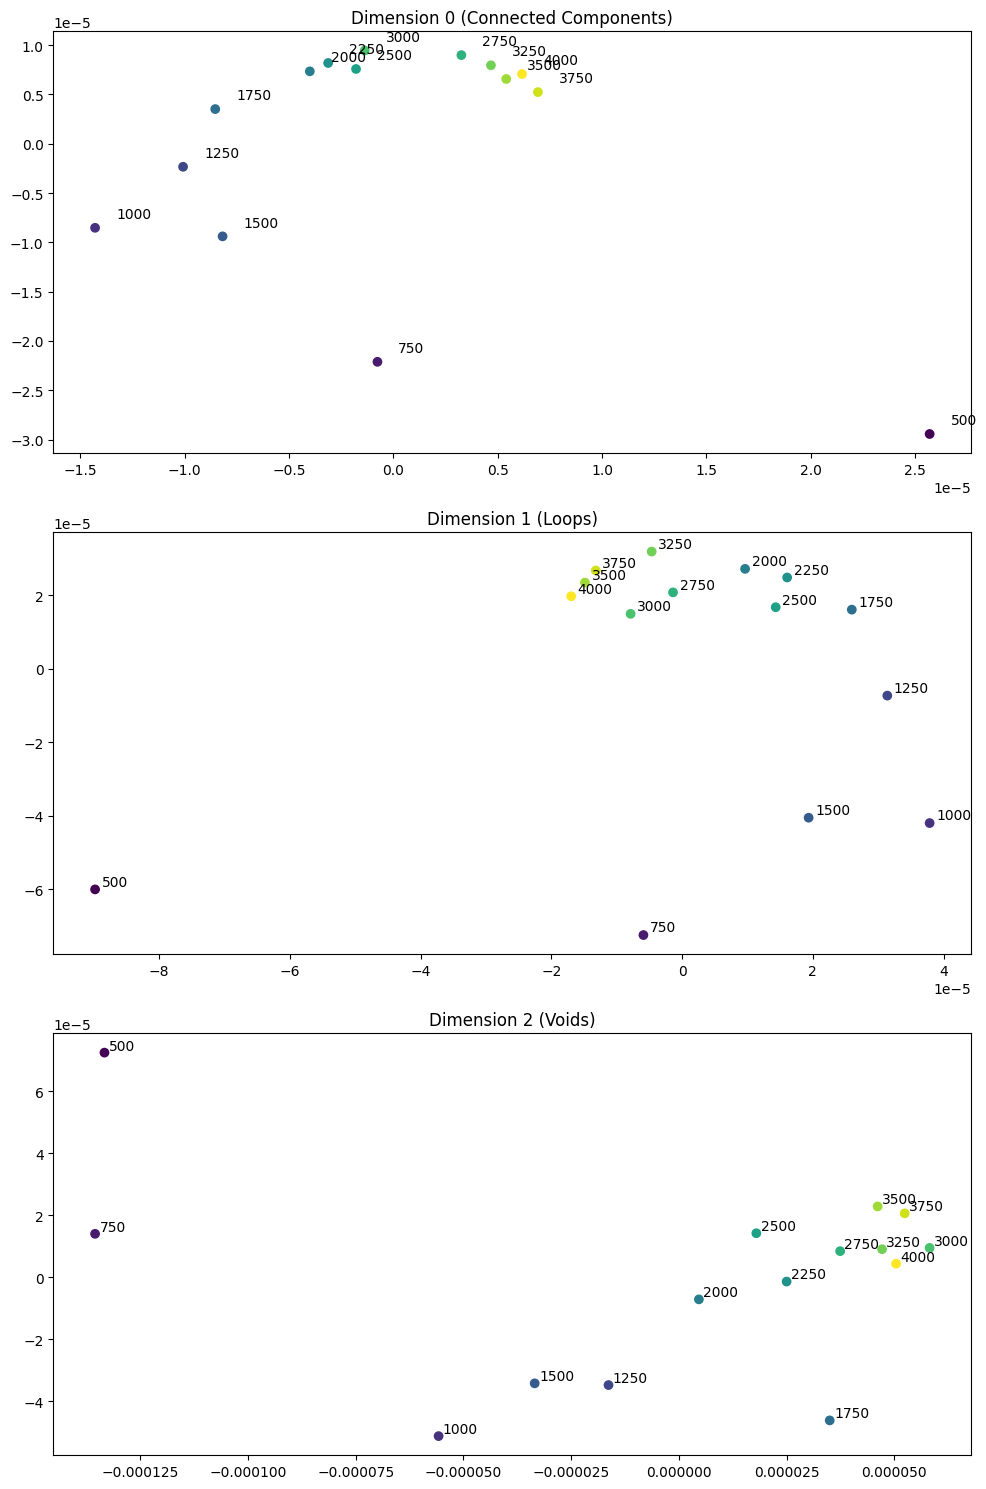

In [6]:
import sklearn.manifold as manifold
# Use Multidimensional Scaling (MDS) to visualize topological differences between samples
# This will allow us to visualize the relationships between the samples based on their persistence intervals
# MDS (Multidimensional Scaling) reduces high-dimensional distance matrices to 2D for visualization
mds = manifold.MDS(
    n_components=2,        # Reduce to 2 dimensions for plotting
    max_iter=3000,         # Maximum iterations for convergence
    eps=1e-9,             # Convergence tolerance
    dissimilarity="precomputed",  # Use precomputed distance matrices B0, B1, B2
    n_jobs=1,             # Number of parallel jobs
    n_init=1              # Number of initializations (silences warnings)
)

# Apply MDS to each bottleneck distance matrix to get 2D coordinates
X0 = mds.fit_transform(B0)  # 2D embedding for dimension 0 (connected components)
X1 = mds.fit_transform(B1)  # 2D embedding for dimension 1 (loops/cycles)
X2 = mds.fit_transform(B2)  # 2D embedding for dimension 2 (voids/cavities)

# Create a single figure with 3 vertically stacked subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sample_names = [s[0] for s in samples]  # Extract sample names for labeling

# Plot dimension 0 embedding (connected components)
axes[0].scatter(X0[:, 0], X0[:, 1], c=range(l), cmap='viridis')
for i, name in enumerate(sample_names):
    # Add sample name labels with slight offset to avoid overlap with points
    axes[0].annotate(name, (X0[i, 0], X0[i, 1]), 
                    xytext=(X0[i, 0] + 0.000001, X0[i, 1] + 0.000001))
axes[0].set_title('Dimension 0 (Connected Components)')

# Plot dimension 1 embedding (loops/cycles)
axes[1].scatter(X1[:, 0], X1[:, 1], c=range(l), cmap='viridis')
for i, name in enumerate(sample_names):
    # Add sample name labels with slight offset
    axes[1].annotate(name, (X1[i, 0], X1[i, 1]), 
                    xytext=(X1[i, 0] + 0.000001, X1[i, 1] + 0.000001))
axes[1].set_title('Dimension 1 (Loops)')

# Plot dimension 2 embedding (voids/cavities)
axes[2].scatter(X2[:, 0], X2[:, 1], c=range(l), cmap='viridis')
for i, name in enumerate(sample_names):
    # Add sample name labels with slight offset
    axes[2].annotate(name, (X2[i, 0], X2[i, 1]), 
                    xytext=(X2[i, 0] + 0.000001, X2[i, 1] + 0.000001))
axes[2].set_title('Dimension 2 (Voids)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()